# ROS ALE Figure S2

Generates Figure S2 from the manuscript "Lab evolution and advanced data analytics reveal systems biology of ROS tolerance" by Kevin Rychel et al., 2022.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set Up</a></span></li><li><span><a href="#Generate-Figure" data-toc-modified-id="Generate-Figure-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Generate Figure</a></span></li></ul></div>

## Set Up

In [1]:
# use py file to set up workspace
from src.ros_ale_functions import *

# load data
ica = load_json_model('input/precise1k_kr.json')
ros_meta = pd.read_csv('input/ros_ale_p1k_metadata.csv', index_col = 0)
hplc_rates = pd.read_csv('input/hplc_rates_kr.csv')

## Generate Figure

Final touches were added in Adobe Illustrator.

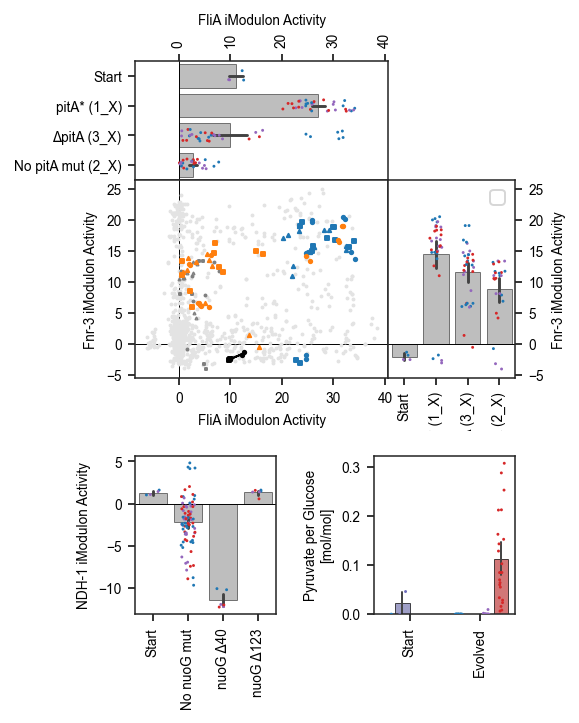

In [14]:
# layout for the figure
fig = plt.figure(figsize = (3.5, 4.5), dpi = 140)
subfigs = fig.subfigures(2, 1, height_ratios = [3, 1.5])
btm_ax = subfigs[1].subplots(1, 2, gridspec_kw = {'wspace': 0.7})

# draw plots
# pitA
pitA_dict = {'Start':['0_0'],
             'pitA* (1_X)':['1_0', '1_1', '1_2', '1_3', '1_4'],
             'ΔpitA (3_X)':['3_0', '3_1', '3_2', '3_3', '3_4'],
             'No pitA mut (2_X)':['2_0', '2_1', '2_2', '2_3']}
pitA_colors = {'Start':'k', 
               'pitA* (1_X)':'tab:blue',
               'ΔpitA (3_X)':'tab:orange',
               'No pitA mut (2_X)':'tab:gray'}
top_ax = scatter_swarm(ica, ros_meta, 'FliA', 'Fnr-3', 
                       strain_dict = pitA_dict, 
                       colors = pitA_colors, fig = subfigs[0])

# nuoG
nuoG_dict = {'Start':['0_0'],
             'No nuoG mut':['1_0', '1_2', '1_3', '1_4',
                      '2_0', '2_1', '2_2', '2_3', '3_0', 
                      '3_1', '3_2', '3_3', '3_4'],
             'nuoG Δ123': ['1_1'],
             'nuoG Δ40': ['3_1']}
im_bar_swarm(ica, ros_meta, 'NDH-1', strain_dict = nuoG_dict,
             ax = btm_ax[0], dodge = False)

# pyruvate
met_bar_swarm(hplc_rates, ros_meta, 
              'pyruvate_rate_per_glc', ax = btm_ax[1])
btm_ax[1].set_ylabel('Pyruvate per Glucose\n[mol/mol]')

plt.savefig('output/fig_s2_raw.pdf')